In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#pd.set_option('display.max_rows', None)  # or 1000

In [3]:
#Import Packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import networkx as nx
from urllib import parse
from scipy import stats
from functools import reduce
from pandas_profiling import ProfileReport
import numpy as np
import scipy.sparse
import scipy.sparse.csgraph

# 9 Final Trainingset incl. WebText

Now we will read in the website text of all companies and clean the website text. As the text is received relatively clean already and an initial lit review showed there is no absolute advantage of extensive cleaning such as stemming, the author will avoid such methods.

All steps will be carried out four times to prepare the four distinct training sets. 

Now we can also vectorize the text. In order to do this, we will do the following steps:

- all to lower case
- minimum occuring frequency: 3
- delete all non english characters
- allow onegrams and bigrams
- delete stopwords from the text
- delete all words containing numbers

# 10 MODELS

In [4]:
#Import Packages
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import networkx as nx
from urllib import parse
from scipy import stats
from functools import reduce
from pandas_profiling import ProfileReport
import numpy as np
import scipy.sparse
import scipy.sparse.csgraph

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.dummy import DummyClassifier


## 10.1 Reading in and featurizing the data

Now we can also vectorize the text. In order to do this, we will do the following steps:

    - all to lower case
    - minimum occuring frequency: 3
    - delete all non english characters
    - allow onegrams and bigrams
    - delete stopwords from the text
    - delete all words containing numbers


#### TrainingSet 1

In [5]:
final1 = pd.read_csv('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Universität/UCL/Programming/MasterThesis/Data/final1.csv')


In [6]:
#convert object dtype into string
final1['CompanyWebText'] = final1['CompanyWebText'].astype('string') #transform the column to a string

#Vectorizing the dict.
tfidf1 = TfidfVectorizer(lowercase=True, min_df=3, norm='l2', strip_accents=ascii,
                        ngram_range=(1, 2), stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')#initiate the above mentioned steps

features1 = tfidf1.fit_transform(final1.CompanyWebText)#vectorize the text
labels1 = final1.isInnovative#create a series with the labels.
features1.shape

(16448, 1467517)

#### Trainingset 2

In [7]:
final2 = pd.read_csv('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Universität/UCL/Programming/MasterThesis/Data/final2.csv')


In [8]:
#convert object dtype into string
final2['CompanyWebText'] = final2['CompanyWebText'].astype('string') #transform the column to a string

#Vectorizing the dict.
tfidf2 = TfidfVectorizer(lowercase=True, min_df=3, norm='l2', strip_accents=ascii,
                        ngram_range=(1, 2), stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')#initiate the above mentioned steps

features2 = tfidf2.fit_transform(final2.CompanyWebText)#vectorize the text
labels2 = final2.isInnovative#create a series with the labels.
features2.shape

(4445, 383461)

#### Trainingset 3

In [9]:
final3 = pd.read_csv('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Universität/UCL/Programming/MasterThesis/Data/final3.csv')


In [10]:
#convert object dtype into string
final3['CompanyWebText'] = final3['CompanyWebText'].astype('string') #transform the column to a string

#Vectorizing the dict.
tfidf3 = TfidfVectorizer(lowercase=True, min_df=3, norm='l2', strip_accents=ascii,
                        ngram_range=(1, 2), stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')#initiate the above mentioned steps

features3 = tfidf3.fit_transform(final3.CompanyWebText)#vectorize the text
labels3 = final3.isInnovative#create a series with the labels.
features3.shape

(16299, 1448123)

#### Trainingset 4

In [42]:
final4 = pd.read_csv('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Universität/UCL/Programming/MasterThesis/Data/final4.csv')


In [43]:
#convert object dtype into string
final4['CompanyWebText'] = final4['CompanyWebText'].astype('string') #transform the column to a string

#Vectorizing the dict.
tfidf4 = TfidfVectorizer(lowercase=True, min_df=3, norm='l2', strip_accents=ascii,
                        ngram_range=(1, 2), stop_words='english', token_pattern=r'(?u)\b[A-Za-z]+\b')#initiate the above mentioned steps

features4 = tfidf4.fit_transform(final4.CompanyWebText)#vectorize the text
labels4 = final4.isInnovative#create a series with the labels.
features4.shape

(29860, 2403736)

## 10.2 Initial Model Selection

I will only choose linear models and Random Forest. The reasoning behind is, that we have a trade-off between explainability to endusers, speed and accuracy. By choosing an approach which is explainable and quick to run, we will have to accept lower accuracy.

To simplify the approach, I will use the TrainingSet1 to select the models and not run the initial comparison on all models.

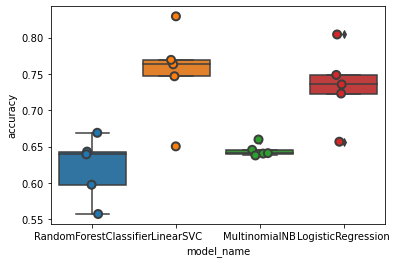

In [13]:
#test various models and how they do on a simple basis
models = [
    RandomForestClassifier(n_estimators=5, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:#for loop to go through the models
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features1, labels1, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

#visualize how high the accuracy of each model is
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

Thi simple text (without adapting the models) shows that Linear SVC and Logistic Regression seem the bost promising with an average accuracy of 82% and 81% respectively. We will look further into these and work on these.

The baseline model will be the uniform random guessing from sklearn

## 10.3 Baseline model

#### TrainingSet1 prep for baseline model

In [14]:
X_train1, X_test1, y_train1, y_test1, indices_train1, indices_test1 = train_test_split(features1,
                                                                                       labels1,
                                                                                       final1.index,
                                                                                       test_size=0.33,
                                                                                       random_state=0)

In [15]:
dummy1 = DummyClassifier(strategy='most_frequent', random_state=0)
dummy1.fit(X_train1, y_train1)
dummy1.score(X_test1, y_test1)

DummyClassifier(random_state=0, strategy='most_frequent')

0.5571112748710391

In [16]:
baseline1 = dummy1.score(X_test1, y_test1)

#### TrainingSet 2

In [17]:
X_train2, X_test2, y_train2, y_test2, indices_train2, indices_test2 = train_test_split(features2,
                                                                                       labels2,
                                                                                       final2.index,
                                                                                       test_size=0.33,
                                                                                       random_state=0)

In [18]:
dummy2 = DummyClassifier(strategy='most_frequent', random_state=0)
dummy2.fit(X_train2, y_train2)
dummy2.score(X_test2, y_test2)

DummyClassifier(random_state=0, strategy='most_frequent')

0.6823449216087253

In [19]:
baseline2 = dummy2.score(X_test2, y_test2)

#### TrainingSet 3

In [20]:
X_train3, X_test3, y_train3, y_test3, indices_train3, indices_test3 = train_test_split(features3,
                                                                                       labels3,
                                                                                       final3.index,
                                                                                       test_size=0.33,
                                                                                       random_state=0)

In [21]:
dummy3 = DummyClassifier(strategy='most_frequent', random_state=0)
dummy3.fit(X_train3, y_train3)
dummy3.score(X_test3, y_test3)

DummyClassifier(random_state=0, strategy='most_frequent')

0.9081613682840677

In [22]:
baseline3 = dummy3.score(X_test3, y_test3)

#### TrainingSet 4

In [44]:
X_train4, X_test4, y_train4, y_test4, indices_train4, indices_test4 = train_test_split(features4,
                                                                                       labels4,
                                                                                       final4.index,
                                                                                       test_size=0.33,
                                                                                       random_state=0)

In [45]:
dummy4 = DummyClassifier(strategy='most_frequent', random_state=0)
dummy4.fit(X_train4, y_train4)
dummy4.score(X_test4, y_test4)

DummyClassifier(random_state=0, strategy='most_frequent')

0.508727420336919

In [46]:
baseline4 = dummy4.score(X_test4, y_test4)

## 10.3 Linear Support Vector Classification Algorithm

#### TrainingSet1

LinearSVC()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

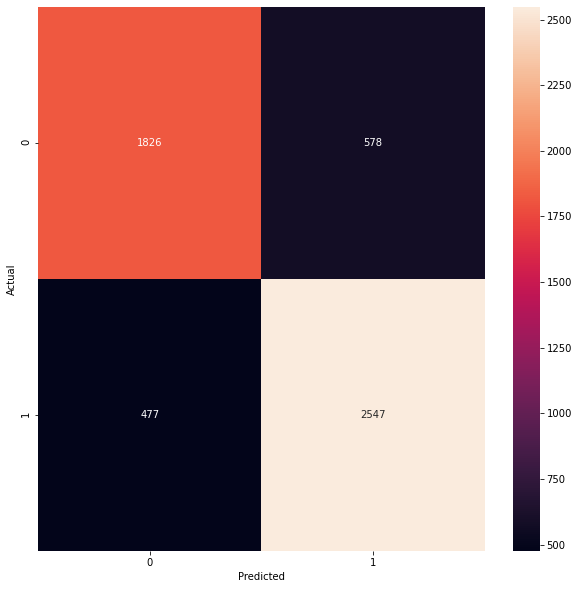

In [26]:
model1 = LinearSVC()#assign the model

model1.fit(X_train1, y_train1)#fit the model

y_pred1 = model1.predict(X_test1)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat1 = confusion_matrix(y_test1, y_pred1)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat1, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [27]:
auc1 = roc_auc_score(y_test1, y_pred1)
print('AUC: %.3f' % auc1)

#we got an AUC of 86.3%. Pretty sweet.

AUC: 0.801


In [28]:
# print values and their importance
words_linearSVC1 = pd.DataFrame(tfidf1.idf_, index=tfidf1.get_feature_names(),columns=["words_linearSVC_1"]) 
 
# sort ascending 
words_linearSVC1.sort_values(by=['words_linearSVC_1'])

,words_linearSVC_1
contact,1.184037
new,1.241333
home,1.285718
uk,1.313027
s,1.333946
...,...
portfolio breadth,9.321726
portfolio bring,9.321726
born died,9.321726
portfolio apply,9.321726


In [29]:
words_linearSVC_1 = words_linearSVC1.sort_values(by=['words_linearSVC_1'], ascending=False).head(20)

from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV

model = CalibratedClassifierCV(LinearSVC())
model.fit(X_train, y_train)#fit the model
y_pred = model.predict(X_test)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

model = LinearSVC()#assign the model

model.fit(X_train, y_train)#fit the model

y_pred = model.predict_proba(X_test)#predict

#### TrainingSet2

LinearSVC()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

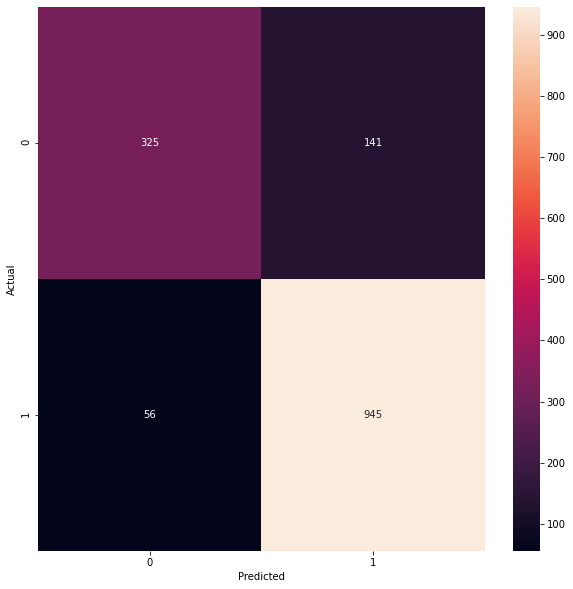

In [31]:
model2 = LinearSVC()#assign the model

model2.fit(X_train2, y_train2)#fit the model

y_pred2 = model2.predict(X_test2)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat2 = confusion_matrix(y_test2, y_pred2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat2, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [32]:
auc2 = roc_auc_score(y_test2, y_pred2)
print('AUC: %.3f' % auc2)

#we got an AUC of 82.1%. Pretty sweet.

AUC: 0.821


In [33]:
# print values and their importance
words_linearSVC2 = pd.DataFrame(tfidf2.idf_, index=tfidf2.get_feature_names(),columns=["words_linearSVC_2"]) 
 
# sort ascending 
words_linearSVC2.sort_values(by=['words_linearSVC_2'])

,words_linearSVC_2
contact,1.219439
new,1.269112
uk,1.335124
home,1.337012
use,1.351291
...,...
requirements prices,8.013466
home bristol,8.013466
requirements problem,8.013466
requirements plant,8.013466


In [34]:
words_linearSVC_2 = words_linearSVC2.sort_values(by=['words_linearSVC_2'], ascending=False).head(20)

#### TrainingSet3

LinearSVC()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

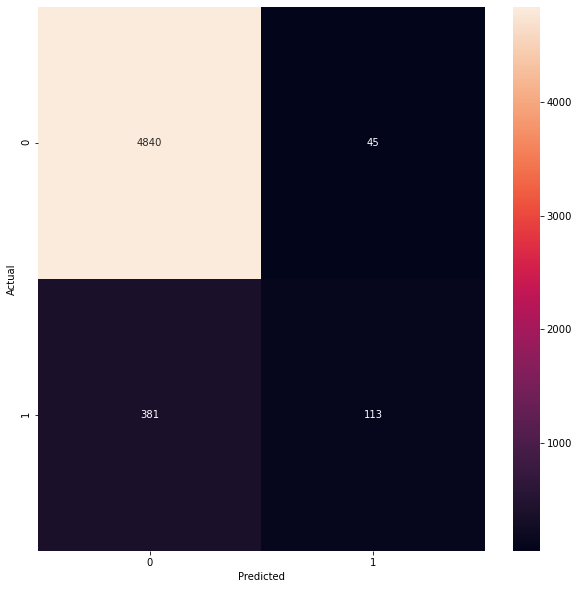

In [35]:
model3 = LinearSVC()#assign the model

model3.fit(X_train3, y_train3)#fit the model

y_pred3 = model3.predict(X_test3)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat3 = confusion_matrix(y_test3, y_pred3)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat3, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [36]:
auc3 = roc_auc_score(y_test3, y_pred3)
print('AUC: %.3f' % auc3)

#we got an AUC of 86.3%. Pretty sweet.

AUC: 0.610


In [37]:
# print values and their importance
words_linearSVC3 = pd.DataFrame(tfidf3.idf_, index=tfidf3.get_feature_names(),columns=["words_linearSVC_3"]) 
 
# sort ascending 
words_linearSVC3.sort_values(by=['words_linearSVC_3'])

,words_linearSVC_3
contact,1.211176
new,1.269605
home,1.302515
time,1.346473
uk,1.350385
...,...
representation marketing,9.312626
representation major,9.312626
representation information,9.312626
representation help,9.312626


In [38]:
words_linearSVC_3 = words_linearSVC3.sort_values(by=['words_linearSVC_3'], ascending=False).head(20)

#### TrainingSet4

LinearSVC()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

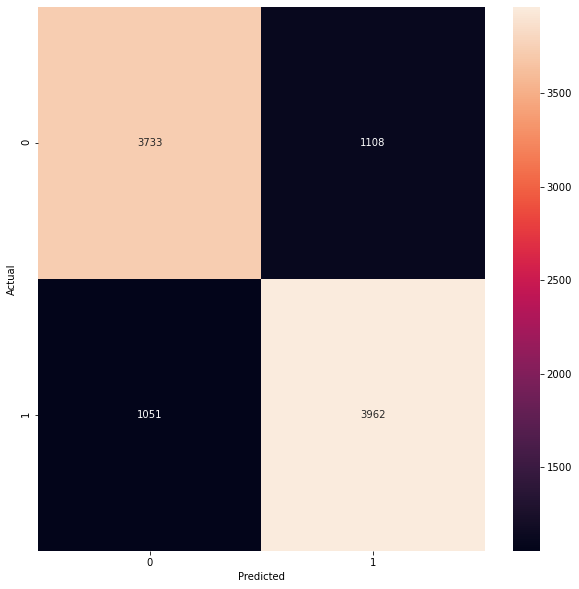

In [47]:
model4 = LinearSVC()#assign the model

model4.fit(X_train4, y_train4)#fit the model

y_pred4 = model4.predict(X_test4)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat4 = confusion_matrix(y_test4, y_pred4)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat4, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [48]:
auc4 = roc_auc_score(y_test4, y_pred4)
print('AUC: %.3f' % auc4)

#we got an AUC of 86.3%. Pretty sweet.

AUC: 0.781


In [49]:
# print values and their importance
words_linearSVC4 = pd.DataFrame(tfidf4.idf_, index=tfidf4.get_feature_names(),columns=["words_linearSVC_4"]) 
 
# sort ascending 
words_linearSVC4.sort_values(by=['words_linearSVC_4'])

,words_linearSVC_4
contact,1.163932
home,1.256331
new,1.262495
uk,1.314919
email,1.338175
...,...
arrangements field,9.918014
arrangements feedback,9.918014
fileshare,9.918014
files xml,9.918014


In [50]:
words_linearSVC_4 = words_linearSVC4.sort_values(by=['words_linearSVC_4'], ascending=False).head(20)

## 10.3 Logistic Regression Model

#### TrainingSet1

LogisticRegression()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

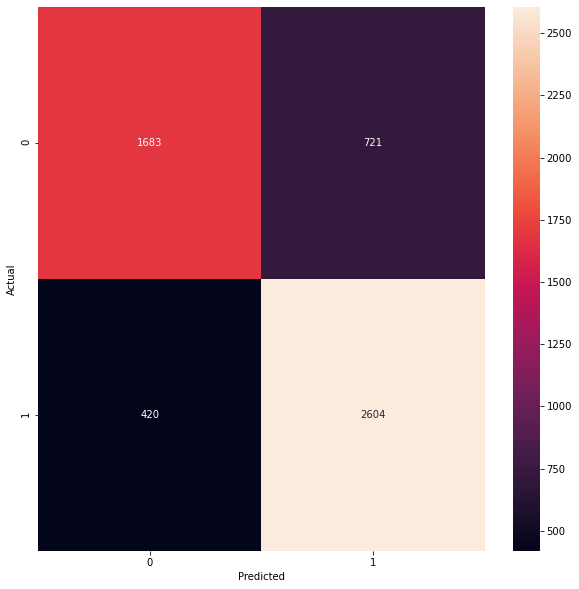

In [51]:
model5 = LogisticRegression()#assign the model

model5.fit(X_train1, y_train1)#fit the model

y_pred5 = model5.predict(X_test1)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat5 = confusion_matrix(y_test1, y_pred5)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat5, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [52]:
auc5 = roc_auc_score(y_test1, y_pred5)
print('AUC: %.3f' % auc5)

#we got an AUC of 86.3%. Pretty sweet.

AUC: 0.781


In [53]:
# print values and their importance
words_logisticRegression1 = pd.DataFrame(tfidf1.idf_, index=tfidf1.get_feature_names(),columns=["word_logreg_1"]) 
 
# sort ascending 
words_logisticRegression1.sort_values(by=['word_logreg_1'])

,word_logreg_1
contact,1.184037
new,1.241333
home,1.285718
uk,1.313027
s,1.333946
...,...
portfolio breadth,9.321726
portfolio bring,9.321726
born died,9.321726
portfolio apply,9.321726


In [54]:
word_logreg_1 = words_logisticRegression1.sort_values(by=['word_logreg_1'], ascending=False).head(20)

#### TrainingSet2

LogisticRegression()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

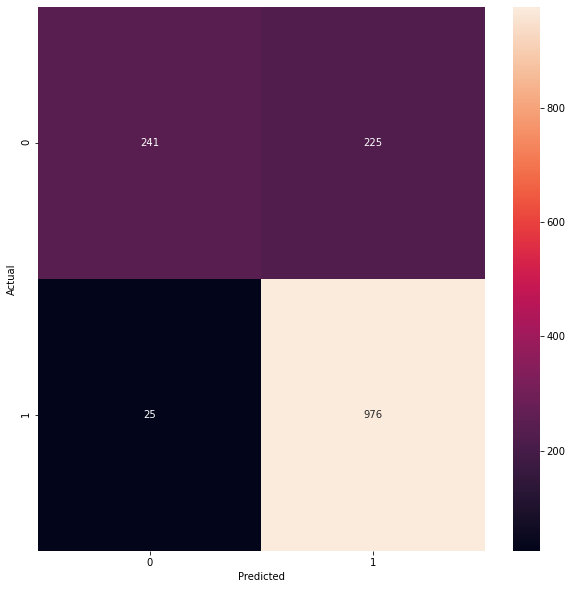

In [55]:
model6 = LogisticRegression()#assign the model

model6.fit(X_train2, y_train2)#fit the model

y_pred6 = model6.predict(X_test2)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat6 = confusion_matrix(y_test2, y_pred6)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat6, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
auc6 = roc_auc_score(y_test2, y_pred6)
print('AUC: %.3f' % auc6)

#we got an AUC of 86.3%. Pretty sweet.

AUC: 0.746


In [57]:
# print values and their importance
words_logisticRegression2 = pd.DataFrame(tfidf2.idf_, index=tfidf2.get_feature_names(),columns=["word_logreg_2"]) 
 
# sort ascending 
words_logisticRegression2.sort_values(by=['word_logreg_2'])

,word_logreg_2
contact,1.219439
new,1.269112
uk,1.335124
home,1.337012
use,1.351291
...,...
requirements prices,8.013466
home bristol,8.013466
requirements problem,8.013466
requirements plant,8.013466


In [58]:
word_logreg_2 = words_logisticRegression2.sort_values(by=['word_logreg_2'], ascending=False).head(20)

#### TrainingSet3

LogisticRegression()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

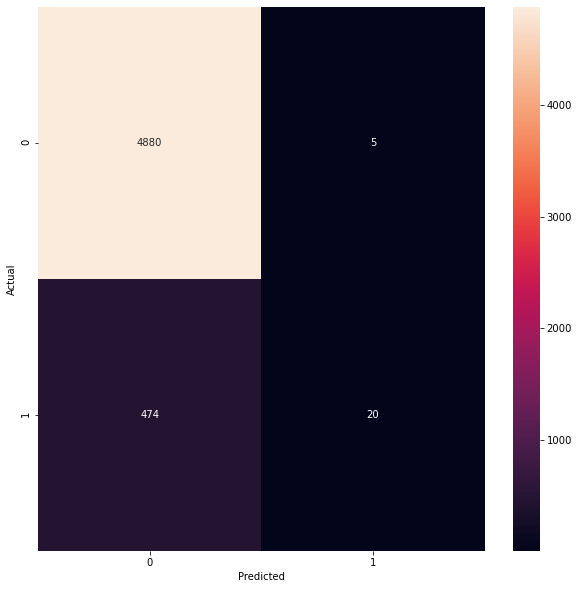

In [59]:
model7 = LogisticRegression()#assign the model

model7.fit(X_train3, y_train3)#fit the model

y_pred7 = model7.predict(X_test3)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat7 = confusion_matrix(y_test3, y_pred7)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat7, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
auc7 = roc_auc_score(y_test3, y_pred7)
print('AUC: %.3f' % auc7)

#we got an AUC of 86.3%. Pretty sweet.

AUC: 0.520


In [61]:
# print values and their importance
words_logisticRegression3 = pd.DataFrame(tfidf3.idf_, index=tfidf3.get_feature_names(),columns=["word_logreg_3"]) 
 
# sort ascending 
words_logisticRegression3.sort_values(by=['word_logreg_3'])

,word_logreg_3
contact,1.211176
new,1.269605
home,1.302515
time,1.346473
uk,1.350385
...,...
representation marketing,9.312626
representation major,9.312626
representation information,9.312626
representation help,9.312626


In [62]:
word_logreg_3 = words_logisticRegression3.sort_values(by=['word_logreg_3'], ascending=False).head(20)

#### TrainingSet4

LogisticRegression()

Text(69.0, 0.5, 'Actual')

Text(0.5, 69.0, 'Predicted')

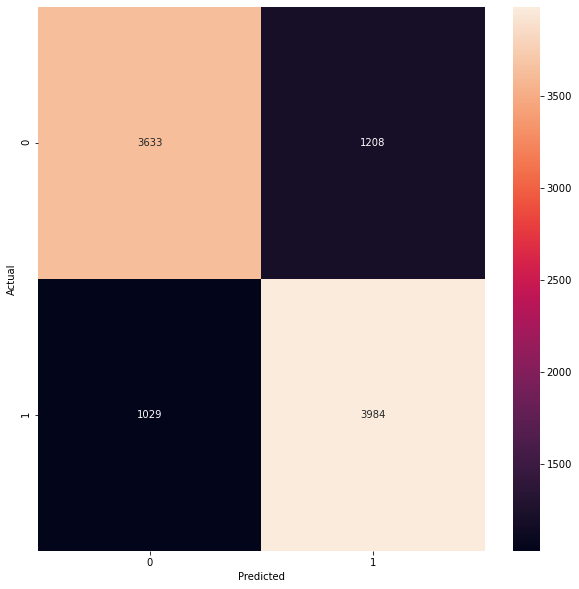

In [63]:
model8 = LogisticRegression()#assign the model

model8.fit(X_train4, y_train4)#fit the model

y_pred8 = model8.predict(X_test4)#predict

#Create a confusion matrics with TP/TN/FP/FN
conf_mat8 = confusion_matrix(y_test4, y_pred8)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat8, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [64]:
auc8 = roc_auc_score(y_test4, y_pred8)
print('AUC: %.3f' % auc8)

#we got an AUC of 86.3%. Pretty sweet.

AUC: 0.773


In [65]:
# print values and their importance
words_logisticRegression4 = pd.DataFrame(tfidf4.idf_, index=tfidf4.get_feature_names(),columns=["word_logreg_4"]) 
 
# sort ascending 
words_logisticRegression4.sort_values(by=['word_logreg_4'])

,word_logreg_4
contact,1.163932
home,1.256331
new,1.262495
uk,1.314919
email,1.338175
...,...
arrangements field,9.918014
arrangements feedback,9.918014
fileshare,9.918014
files xml,9.918014


In [66]:
word_logreg_4 = words_logisticRegression4.sort_values(by=['word_logreg_4'], ascending=False).head(20)

# 11. Validate the results

Validating the results is difficult and, due to the lack of the missingness of coherent innovation metrices arbitrary. The approach I have chosen is to manually generate a sample of "innovative companies" based on public rankings of well-known media outlets such as Forbes etc.

While I will not have a probability of being innovative for a company in this validation set, it nevertheless appears to be valid insofar as the final model will be used to rank companies and present these to the users. Users perceive the innovativeness - which do the media outlets chosen as well. Therefore, while not entirely scientific, it will give an rough indication.

Further, this also allows to compare the different models with each other on these validation companies. 

In [67]:
validate = pd.read_csv('/Users/Michael/Library/Mobile Documents/com~apple~CloudDocs/Universität/UCL/Programming/MasterThesis/Data/Validation.csv')

In [68]:
#create a list with all company numbers
company_nums = validate['CompanyNumber']

#create an empty list for the dtaframes
dataframes = []

#open the connection to the database
con = sqlite3.connect("/Users/Michael/Desktop/OrganisationMLLite_Mar2021.db")

#loop over each row in the database to avoid loading everything into memory and the kernel from dying
for company_num in company_nums:
    webtext = pd.read_sql_query(f'SELECT CompanyNumber, CompanyWebText FROM OrganisationML WHERE CompanyNumber == "{company_num}"', con)
    dataframes.append(webtext)#add the row to the list of dataframes
    
val_text = pd.concat(dataframes)#concat all dataframes together

#close the database connection
con.close()

In [69]:
val_final = val_text.merge(validate, on="CompanyNumber", how='inner')#add all_data and website text
val_final['CompanyWebText'] = val_final['CompanyWebText'].astype('string') #transform the column to a string

### Linear SVC 1

In [70]:
features_val_final1 = tfidf1.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred1 = model1.predict(features_val_final1)#predict their innovativeness

val_final['pred_LinSVC1'] = unseen_pred1.tolist() #add the prediction to the df for comparison

### Linear SVC 2

In [71]:
features_val_final2 = tfidf2.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred2 = model2.predict(features_val_final2)#predict their innovativeness

val_final['pred_LinSVC2'] = unseen_pred2.tolist() #add the prediction to the df for comparison

### Linear SVC 3

In [72]:
features_val_final3 = tfidf3.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred3 = model3.predict(features_val_final3)#predict their innovativeness

val_final['pred_LinSVC3'] = unseen_pred3.tolist() #add the prediction to the df for comparison

### Linear SVC 4

In [73]:
features_val_final4 = tfidf4.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred4 = model4.predict(features_val_final4)#predict their innovativeness

val_final['pred_LinSVC4'] = unseen_pred4.tolist() #add the prediction to the df for comparison

### LinReg 1

In [74]:
features_val_final5 = tfidf1.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred5 = model5.predict(features_val_final5)#predict their innovativeness

val_final['pred_LinReg1'] = unseen_pred5.tolist() #add the prediction to the df for comparison

### LinReg 2

In [75]:
features_val_final6 = tfidf2.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred6 = model6.predict(features_val_final2)#predict their innovativeness

val_final['pred_LinReg2'] = unseen_pred6.tolist() #add the prediction to the df for comparison

### LinReg 3

In [76]:
features_val_final7 = tfidf3.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred7 = model7.predict(features_val_final7)#predict their innovativeness

val_final['pred_LinReg3'] = unseen_pred7.tolist() #add the prediction to the df for comparison

### LinReg 4

In [77]:
features_val_final8 = tfidf4.transform(val_final.CompanyWebText)#transform the unseen data

unseen_pred8 = model8.predict(features_val_final8)#predict their innovativeness

val_final['pred_LinReg4'] = unseen_pred8.tolist() #add the prediction to the df for comparison

In [78]:
val_final

,CompanyNumber,CompanyWebText,CompanyName,Rank,Source,expected_prediction,pred_LinSVC1,pred_LinSVC2,pred_LinSVC3,pred_LinSVC4,pred_LinReg1,pred_LinReg2,pred_LinReg3,pred_LinReg4
0,06240773,IHS Markit | Leading Source of Critical Inform...,ihs markit,33.0,Forbes,1,1,1,0,1,1,1,0,1
1,06270876,"RB | Protect, heal and nurture | rb.com Skip ...",Reckitt Benckiser Group,56.0,Forbes,1,1,1,0,1,1,1,0,1
2,03165891,Compass Group This website uses cookies. To a...,Compass Group,63.0,Forbes,1,1,1,0,1,1,1,0,1
3,02746616,RELX skip to main content Our Business Our bu...,Relx Group,85.0,Forbes,1,1,1,0,1,1,1,0,1
4,04222753,Discover Diageo | Producer Of Beer And Spirits...,Diageo,98.0,Forbes,1,1,1,0,1,1,1,0,1
5,09203334,Entocycle | The Insect Farming Company Produc...,Entocycle,1.0,Beauhorst,1,1,1,0,0,1,1,0,1
6,07330525,CBILS funding | Invoice finance | Business loa...,MarketFinance,2.0,Beauhorst,1,1,1,0,1,1,1,0,1
7,07054929,Tokamak Energy Twitter Instagram LinkedIn You...,Tokamak Energy,3.0,Beauhorst,1,1,1,0,0,1,1,0,0
8,01391256,Home page | Veolia UK Resourcing the world Se...,Veolia,4.0,Beauhorst,1,1,1,0,1,1,1,0,1
9,05513242,Magtec - Home Home Home News Articles Fact Sh...,Magtec,5.0,Beauhorst,1,1,1,1,1,1,1,1,1


## Comparing words

In [79]:
aucs = [baseline1, auc1, auc5, baseline2, auc2, auc6, baseline3, auc3, auc7, baseline4, auc4, auc8]
auc_comparison = pd.DataFrame(aucs)
auc_comparison = auc_comparison.T
auc_comparison=auc_comparison.rename(columns={0:'baseline1',1:'linearSVC1',2:'logReg1',3:'baseline2', 4:'linearSVC2',5:'logReg2',6:'baseline3',7:'linearSVC3',8:'logReg3',9:'baseline4',10:'linearSVC4',11:'logReg4'})
auc_comparison


,baseline1,linearSVC1,logReg1,baseline2,linearSVC2,logReg2,baseline3,linearSVC3,logReg3,baseline4,linearSVC4,logReg4
0,0.557111,0.800915,0.780597,0.682345,0.82074,0.746096,0.908161,0.609767,0.519731,0.508727,0.780733,0.772599
